![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [59]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# load in both datasets
women_results = pd.read_csv('women_results.csv')
men_results = pd.read_csv('men_results.csv')

In [60]:
# filter both datasets for only official FIFA World Cup matches (non-qualifiers) 
# from 2002-01-01 and on
women_sorted = women_results[(women_results['date'] >= '2002-01-01') 
                             & (women_results['tournament'] == 'FIFA World Cup')]
men_sorted = men_results[(men_results['date'] >= '2002-01-01') 
                             & (men_results['tournament'] == 'FIFA World Cup')]

In [61]:
women_sorted

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup
...,...,...,...,...,...,...,...
4465,4465,2019-06-29,Germany,Sweden,1,2,FIFA World Cup
4466,4466,2019-07-02,England,United States,1,2,FIFA World Cup
4467,4467,2019-07-03,Netherlands,Sweden,1,0,FIFA World Cup
4468,4468,2019-07-06,England,Sweden,1,2,FIFA World Cup


In [62]:
men_sorted

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup
...,...,...,...,...,...,...,...
44343,44343,2022-12-10,England,France,1,2,FIFA World Cup
44345,44345,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup
44346,44346,2022-12-14,France,Morocco,2,0,FIFA World Cup
44350,44350,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup


### Finding our Hypothesis Test
The next step in this project is to identify which hypothesis test would be the most appropriate for our specific question.

Our hypothesis is that there are more goals scored on average in women's international soccer matches than in the men's games. Our sample data includes the official FIFA World Cup matches since 2002 to limit some error due to variation and changes in international play over time. 
We'll use our sample set to test our hypothesis on the greater population of international games. 

As stated before, our hypothesis is that the average goals in women's matches > men's matches, so that's our alternative hypothesis, or $H_A$. The null hypothesis, or $H_0$, is that the average goals scored across both are the same.

Since there are two independent groups, we'll need to perform an unpaired two-sample test.

Next, we'll need to determine if a parametric or non-parametric test is needed, so let's compare distributions to see if they appear to be normally distributed.

In [63]:
# first, we need to create a total goals column within both dataframes to make our calcs easier
women_sorted['total_goals'] = women_sorted['home_score'] + women_sorted['away_score']
women_sorted['group'] = 'women'
men_sorted['total_goals'] = men_sorted['home_score'] + men_sorted['away_score']
men_sorted['group'] = 'men'

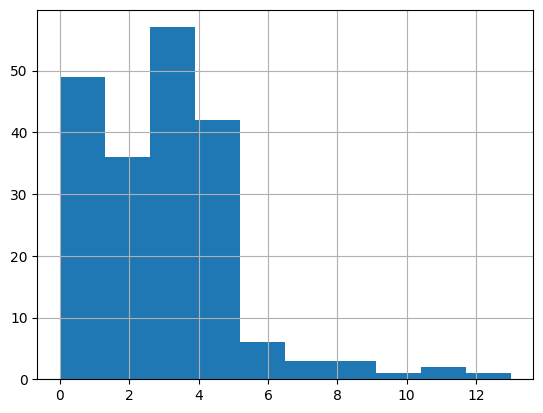

In [64]:
women_sorted['total_goals'].hist()
plt.show()

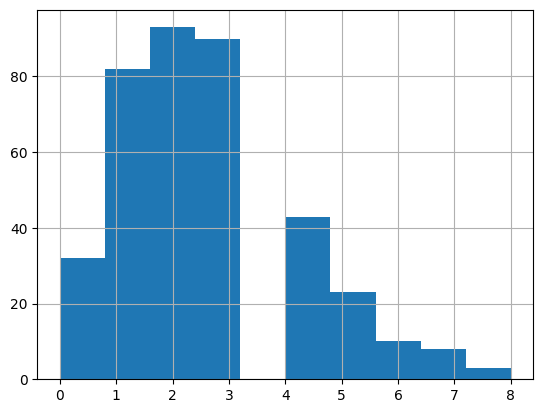

In [65]:
men_sorted['total_goals'].hist()
plt.show()

As we can see in the plots above, the sample data is not normally distributed, so we'll need to perform a parametric version of an unpaired t-test. This will be a Wilcoxon-Mann-Whitney test.

In [66]:
import pingouin

# combine datasets for easier pivoting later
both = pd.concat([women_sorted, men_sorted], axis=0, ignore_index=True)

# for the pingouin.mwu() test, we'll need to pivot the dataframe
both_subset = both[['total_goals', 'group']]
both_pivot = both_subset.pivot(columns='group', values='total_goals')

In [67]:
# now we calculate our p-value using pingouin.mwu()
results = pingouin.mwu(x=both_pivot['women'], y=both_pivot['men'], alternative='greater')
results

,U-val,alternative,p-val,RBC,CLES
MWU,43273.0,greater,0.005107,-0.126901,0.563451


### Results
As we can see in the calculations above, our p-value of 0.00511 is significantly smaller than our significan level of 0.1, so we choose to reject the null hypothesis that the average goals scored is the same across women's and men's matches.

In [68]:
result = 'reject'
p_val = np.array(results['p-val'])
result_dict = {'p_val': p_val[0], 'result': result}
result_dict

{'p_val': 0.005106609825443641, 'result': 'reject'}